# **AISaturdays ECG Challenge**
![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de esta semana. Esta vez detectaremos casos de enfermedad cardiovascular a través del análisis de electrocardiogramas (ECG).

**Instrucciones:**

- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib/Seaborn), Numpy y Keras.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Aplicar un modelo de NN .
- Mejorar la predicción optimizando el modelo.
- Guardar y cargar nuestro modelo. 

Este ejercicio está basado en un [paper](https://arxiv.org/pdf/1805.00794.pdf) que resuelve el problema al que nos enfrentamos. Tomadlo como una fuente de inspiración.

¡Empecemos!

**RESUMEN**
Este challengue viene del paper: https://arxiv.org/pdf/1805.00794.pdf el cual, a partir de de los datasets PhysionNet’s MIT-BIH y PTB Diagnostics, realizan una clasificacion de diferentes tipos de electrocardiogramas con un accuracy del 93.4% para arritmias y 95.9% para MI con el uso de RNN.


# Importación de librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# A) Análisis de datos

In [131]:
#Nos conectamos a nuestro Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Importa el dataset.



In [3]:
# Solo una linea de código.
#data = pd.read_csv('/content/drive/MyDrive/SATURDAYS AI/mitbih_train.csv', header= None)
data = pd.read_csv('mitbih_train.csv', header= None)

### 2. ¿Que forma tiene el dataset?

In [133]:
# Solo una linea de código.
data.shape

(87554, 188)

In [134]:
label_names = ('normal', 'arritmia_prematura', 'contracción_prematura_ventricular', 'fusión_contraccion_ventricular', 'resucitación')

### 3. Vamos a ver como son los datos. Muestra las primero cinco filas del dataset.

In [135]:
# Solo una linea de código.
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Este es el dataset de hoy. Esta vez, cada columna representa una lectura del electrocardiograma (recogido a 125Hz). En total hay 187 lecturas, es decir, los datos de las pulsaciones se recogen desde la primera columna hasta la penúltima **(columnas de 0 a 186)**, donde tenemos alrededor de **segundo y medio de pulsaciones**. 

La **última columna (187)** contiene la categoría a la que pertenecen estas pulsaciones. En total hay cinco, cada una representada por un número:

    - Normal: 0
    - Arritmia prematura (atrial, aberrante-atrial, nodal o supra-ventricular): 1
    - Contracción prematura ventricular o escape ventricular: 2
    - Fusión de la contracción ventricular y normal: 3
    - Resucitación, fusión de normal y resucitación o inclasificable: 4


In [136]:
# Comprobamos que efectivamente son 5 categorías
categorias= data[187].unique()

In [137]:
# Comprobamos que no hay valores nulos en el dataset 
data.isnull().sum().sum()

0

In [138]:
# Comprobamos que todas las columnas son tipo float
data.dtypes.unique()

array([dtype('float64')], dtype=object)

### 4. Describe la distribución de los datos.

In [139]:
# Solo una linea de código. 
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [140]:
#los datos ya estan normalizados 

### 5. Vamos a ver cómo es uno de estos electrocardiogramas. Haz una gráfica con los datos de una de las filas.

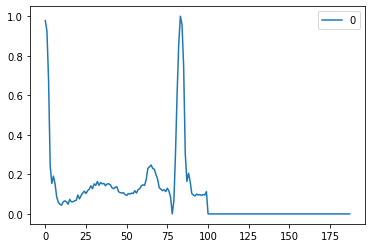

In [141]:
#Solo una linea de código.
sns.lineplot(data = data[:1].transpose())


## B) Entendemos los datos

### 6. Ahora que hemos visualizado nuestros datos, vamos a trabajar con ellos. Primero tenemos que dividirlos entre input y output. 

Divide el dataset en dos: una parte que contenga todas las columnas con datos del electrocardiograma y otro con las etiquetas. Transformar el dataset en un array de Numpy lo hace mas facil porque puedes usar slicing. 

In [142]:
# Dos líneas de código. Utiliza .values
X= data.drop(187, axis=1).to_numpy()
y= data[187].values

In [143]:
X

array([[0.98, 0.93, 0.68, ..., 0.  , 0.  , 0.  ],
       [0.96, 0.86, 0.46, ..., 0.  , 0.  , 0.  ],
       [1.  , 0.66, 0.19, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.91, 0.62, 0.6 , ..., 0.  , 0.  , 0.  ],
       [0.86, 0.65, 0.85, ..., 0.  , 0.  , 0.  ],
       [0.9 , 0.85, 0.8 , ..., 0.  , 0.  , 0.  ]])

###7. Crea arrays con los índices de los ejemplos que pertenecen a cada categoría. La función [np.argwhere](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html) viene muy bien aquí. 

In [144]:
#5 lineas de código

#dos formas, la primera es la eficiente, la bonita, y evita que tengas que añadir nuevas categorias tu por tu cuenta
#sin embargo si lo ponemos de esa forma no sabemos acceder a esos datos para luego representarlo en la comparativa de 
#electrocardiogramas

arrays= dict()
numeros= [] #esto lo necesitas para mas adelante
for ind in categorias:
    arrays[ind]= np.argwhere(y== ind)
    numeros.append(len(arrays[ind])) #con esto metes el numero de muestra en cada grupo de clasificación
    
#otra forma de hacerlo mas fea
#5 lineas de código
#cat0 = np.argwhere(y == 0)
#cat1 = np.argwhere(y == 1)
#cat2 = np.argwhere(y == 2)
#cat3 = np.argwhere(y == 3)
#cat4 = np.argwhere(y == 4)



###8. Cuenta cuantos ejemplos tenemos de cada categoría.

In [145]:
# 5 lineas de código
for key, value in arrays.items(): #para hacer un bucle de un diccionario hay que poner items()
    print (f'Para la categoria {key} hay {len(value)}')

#5 lineas de código
#print("Hay ", len(cat0), "elementos de la categoría 0.")
#print("Hay ", len(cat1), "elementos de la categoría 1.")
#print("Hay ", len(cat2), "elementos de la categoría 2.")
#print("Hay ", len(cat3), "elementos de la categoría 3.")
#print("Hay ", len(cat4), "elementos de la categoría 4.")

Para la categoria 0.0 hay 72471
Para la categoria 1.0 hay 2223
Para la categoria 2.0 hay 5788
Para la categoria 3.0 hay 641
Para la categoria 4.0 hay 6431


###9. Para ver mejor cuantos tenemos de cada tipo vamos a hacer un gráfico de barras. Utiliza [plt.bar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) con una label apropiada para cada barra.

<BarContainer object of 5 artists>

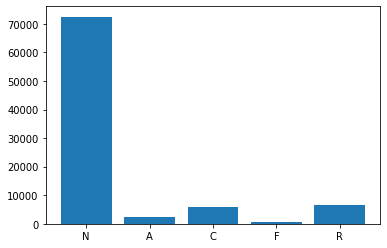

In [146]:
# Diagrama de Barras con Matplotlib
names = ["N", "A", "C", "F", "R"]
plt.bar(names, numeros)

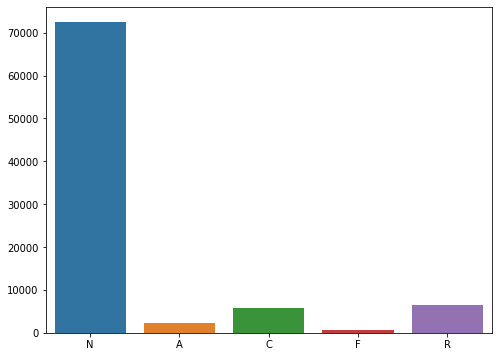

In [147]:
# Diagram de Barras con Seaborn
plt.figure(figsize=(8,6))
sns.barplot(names, numeros)

###10. Finalmente, vamos a comparar electrocardiogramas de un tipo con los otros con otra gráfica. Dibuja un electrocardiograma de cada tipo, uno encima del otro. Puntos extra por ponerle un título y leyenda.

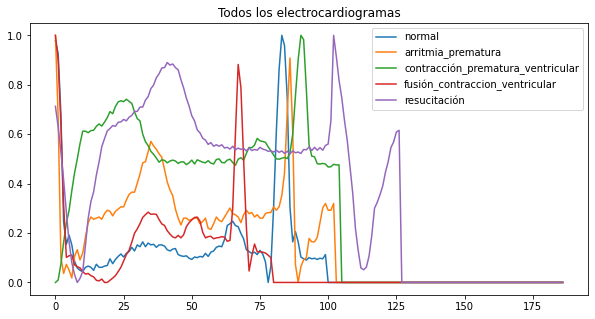

In [148]:
#6 lineas de código
index_to_plot= 0
fig, ax= plt.subplots(figsize=(10,5))
for i in np.unique(y):
    ax.plot(X[arrays[i][0]][index_to_plot], label = label_names[int(i)])
    
plt.title('Todos los electrocardiogramas')
plt.legend()
plt.show()


# C) Preparación de datos

###11. La mejor forma de tratar con categorias es utilizar un OneHotEncoding. Transforma Y (labels) a su OneHotEncoding.

In [149]:
from sklearn.preprocessing import OneHotEncoder

In [150]:
# Dos líneas. Utilizar .reshape(-1, 1) para trasponer la y 
y_dummies = np.zeros((y.size, int(y.max())+1))
y_dummies[np.arange(y.size), y.astype(int)] = 1

###12. Comprueba que el OneHotEncoding ha funcionado, es decir, que por cada columna en la Y original se han creado 5, y que los valores del original y el OneHotEncoding se corresponden entre sí.

In [151]:
# Una línea de código
print(y_dummies)

# Comprobar que la dimensión que tiene que tomar OneHotEncoding es la correcta. Usar la función assert
for i in range(len(y)):
  if y_dummies[i][int(y[i])] != 1:
    print("An error has occurred during one-hot encoding.")

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


###13. Mezcla X e Y_hot de forma aleatoria. Para que las etiquetas concuerden con los ejemplos, usa [shuffle](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html).


In [152]:
from sklearn.utils import shuffle
import sklearn.utils

In [153]:
# Una línea de código
x_data, y_dummies = sklearn.utils.shuffle(X, y_dummies)

### 14. Para poder introducir los datos en el modelo, necesitamos que cada punto de información esté solo dentro del array (no podemos dar un array como valor). 

Antes teníamos los datos estructurados así:


  $ X = [[a_1,a_2,a_3...,a_n],[b_1,b_2,b_3...,b_n]...[z_1,z_2,z_3,z_n]] $


Para poder usarlos necesitamos aislar cada uno de esos valores, sin eliminar su agrupación por ejemplos, lo que quiere decir que necesitamos añadir una dimensión más. Es decir:


  $ X = [[[a_1],[a_2],[a_3]...,[a_n]],[[b_1],[b_2],[b_3]...,[b_n]]...[[z_1],[z_2],[z_3],[z_n]] $

Esto se consigue utilizando la función [expand_dims](https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html) de numpy.

In [154]:
# Shape inicial de X
X_expand = np.expand_dims(x_data, axis=2)

In [155]:
# Dos líneas. Añadimos una dimensión y visualizamos cómo nos queda el shape de X
np.shape(X_expand)

(87554, 187, 1)

Se puede observar cómo hemos añadido una nueva dimensión a los datos de extrada (X).

###15. ¡Ya casi estamos! Solo no queda hacer un train_test_split y estaría todo listo para implementar el modelo.

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
# Una línea de código. Utiliza stratify 
X_train, X_test, y_train, y_test = train_test_split(X_expand, y_dummies, test_size=0.40, random_state=42, stratify= y)

In [158]:
# Comprueba las dimensiones del Train set y del Test set.
print (X_train.shape)
print (X_test.shape)
print (y_test.shape, y_train.shape)

(52532, 187, 1)
(35022, 187, 1)
(35022, 5) (52532, 5)


# D) Modelos prometedores

En esta parte del challenge os planteamos un modelo ya creado para que podais ver como funciona y trastear con los diferentes parámetros. 

Primero importamos unas pocas librerias para plantear el modelo:

In [159]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight

from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 
import itertools

###16. ¿Cual es la longitud de la entrada? (Esta será la cantidad de neuronas que tendremos en la primera capa).¿Cuantas neuronas tendremos en nuestra última capa? También necesitamos un batch_size si queremos entrenar la red neuronal.

In [160]:
# 1 - Longitud de Entrada / Número de neuronas en la primera capa
signal_length = 187
# 2 - Número de neuronas en la última capa / Número de Clases
n_classes = 5
# 3 - Tamaño del Lote (Batch Size)
batch_size = 100

Este es el modelo de la red neuronal. Tiene cuatro capas, dos de ellas ocultas, y utiliza como función de activación ReLU, sigmoid y softmax. 

In [161]:
#HEMOS SILENCIADO LOS DROPOUTS porque en el paper no los tenian, al final veremos una comparación de eliminar algunos
#y de cambiar el modelo de activacion de ELU a RELU 
#¿Qué hacen los dropouts? omiten aleatoriamente un porcentaje (en este caso 0.5) de neuronas durante el entrenamiento
#siendo esto una medida de regularización que evita que el modelo sea sobredependiente de ciertas neuronas

model = Sequential()

model.add(Conv1D(32, kernel_size=(5), input_shape=(signal_length, 1)))
#model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('elu'))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(32, (4)))
#model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

#Resumen del modelo
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_37 (Conv1D)          (None, 183, 32)           192       
                                                                 
 batch_normalization_36 (Bat  (None, 183, 32)          128       
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 183, 32)           0         
                                                                 
 conv1d_38 (Conv1D)          (None, 180, 32)           4128      
                                                                 
 dropout_27 (Dropout)        (None, 180, 32)           0         
                                                                 
 batch_normalization_37 (Bat  (None, 180, 32)          128       
 chNormalization)                                     

Para compilar el modelo, se llama .compile(). Aquí se especifica que función de pérdida usamos, que optimizadores aplicamos y que métricas queremos guardar de cada epoch.

In [162]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

Ahora entrenamos el modelo un número de épocas y con una batch_size especifica. Esto nos devuelve un objeto history con la accuracy de todas las fases de entrenamiento.

In [165]:
import time

epochs = 75
callback = [EarlyStopping(monitor="val_loss", patience=10),ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=5)]

history = model.fit(X_train, y_train,
                    epochs= epochs, 
                    batch_size=batch_size, 
                    verbose=1, 
                    validation_data=(X_test, y_test),
                    callbacks = callback)
start = time.time()
stop = time.time()
print(f"Training time: {stop - start} s")

Epoch 1/75
526/526 [==============================] - 16s 23ms/step - loss: 0.2984 - accuracy: 0.9156 - val_loss: 0.9298 - val_accuracy: 0.6052 - lr: 5.0000e-04
Epoch 2/75
526/526 [==============================] - 8s 15ms/step - loss: 0.1817 - accuracy: 0.9500 - val_loss: 0.2421 - val_accuracy: 0.9441 - lr: 5.0000e-04
Epoch 3/75
526/526 [==============================] - 8s 15ms/step - loss: 0.1536 - accuracy: 0.9562 - val_loss: 0.1815 - val_accuracy: 0.9544 - lr: 5.0000e-04
Epoch 4/75
526/526 [==============================] - 9s 17ms/step - loss: 0.1349 - accuracy: 0.9623 - val_loss: 0.2887 - val_accuracy: 0.9149 - lr: 5.0000e-04
Epoch 5/75
526/526 [==============================] - 9s 17ms/step - loss: 0.1194 - accuracy: 0.9660 - val_loss: 0.1389 - val_accuracy: 0.9642 - lr: 5.0000e-04
Epoch 6/75
526/526 [==============================] - 8s 15ms/step - loss: 0.1108 - accuracy: 0.9687 - val_loss: 0.2553 - val_accuracy: 0.9209 - lr: 5.0000e-04
Epoch 7/75
526/526 [===================

###17. Accede a la accuracy histórica del modelo (con el atributo history).

In [166]:
# Solo una linea de código
history.history

{'accuracy': [0.9156323671340942,
  0.9500495195388794,
  0.9561600685119629,
  0.9623277187347412,
  0.966039776802063,
  0.968742847442627,
  0.970532238483429,
  0.9727023243904114,
  0.9736541509628296,
  0.9750628471374512,
  0.9753864407539368,
  0.9770806431770325,
  0.9789271354675293,
  0.9796885848045349,
  0.9795933961868286,
  0.9794982075691223,
  0.9803357720375061,
  0.9795172214508057,
  0.9803357720375061,
  0.9804690480232239,
  0.9799931645393372,
  0.980545163154602,
  0.980050265789032,
  0.9803738594055176,
  0.9809259176254272,
  0.9806784391403198,
  0.9815350770950317,
  0.9805261492729187,
  0.9810782074928284,
  0.9812875986099243,
  0.9810401201248169,
  0.9813256859779358,
  0.9812495112419128,
  0.9813637137413025,
  0.9809259176254272],
 'loss': [0.29835888743400574,
  0.1817399561405182,
  0.15358121693134308,
  0.13486050069332123,
  0.11939089000225067,
  0.11082804203033447,
  0.10225388407707214,
  0.09576204419136047,
  0.09026259183883667,
  0.0851

###18. Ahora podemos ver si nuestro modelo está haciendo overfitting. Dibuja una gráfica con la accuracy en train y en validation usando los datos del objeto history, frente al número de épocas.
###19. Lo mismo pero con la perdida

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

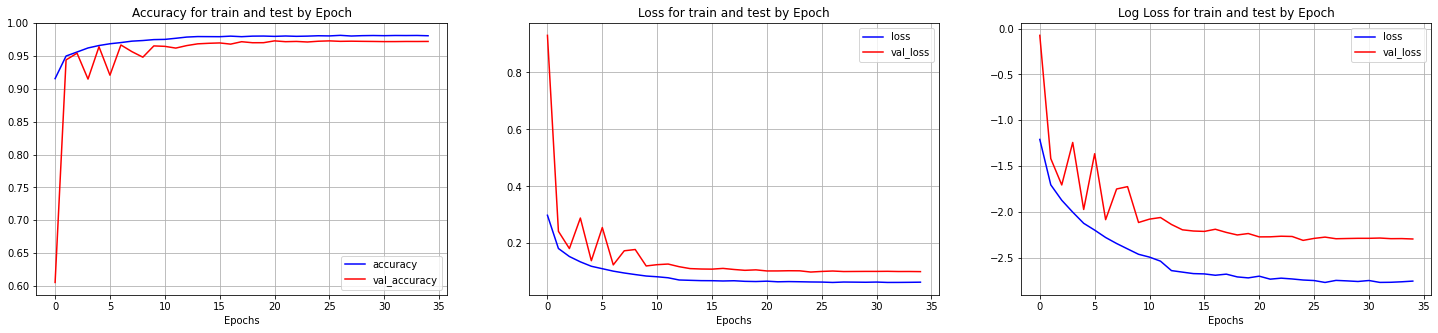

In [168]:
display(history.history.keys()) # aqui se ve que tiene el modelo
get_cols_by_str = lambda s, df: df.columns[df.columns.str.contains(s)]
metrics = pd.DataFrame(history.history)

##############################
plot_args = {
    'color': ['blue','red'],
    'grid' : True,
    'xlabel': 'Epochs'
}

f, ax = plt.subplots(ncols = 3, figsize = (25,5))

metrics[get_cols_by_str(s='loss', df=metrics)].plot.line(ax = ax[1], title='Loss for train and test by Epoch', **plot_args)
metrics[get_cols_by_str(s='loss', df=metrics)].apply(np.log).plot.line(ax = ax[2], title='Log Loss for train and test by Epoch', **plot_args)
metrics[get_cols_by_str(s='accu', df=metrics)].plot.line(ax = ax[0], title='Accuracy for train and test by Epoch', **plot_args)

plt.show()

###20. Calcula las predicciones del modelo con X_test.

In [169]:
# Solo una linea de código
y_pred = model.predict(X_test)

###21. ¿Que dimensiones tiene la predicción y_pred?

In [170]:
#Solo una linea de código
y_pred.shape

(35022, 5)

###22. Evalúa el modelo (utilizar model.evaluate y printear resultados)




Text(0.5, 1.0, 'Predicción para un valor de y_test')

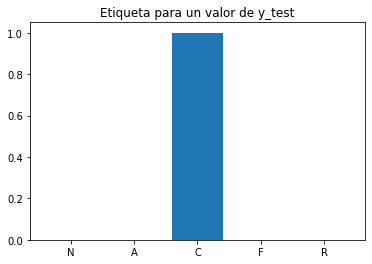

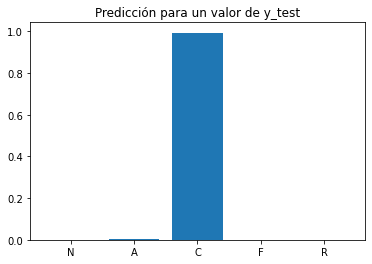

In [171]:
#Solo una linea de código
names = ["N", "A", "C", "F", "R"]

fig1, (ax0) = plt.subplots(ncols=1)

ax0.bar(names, y_test[12345])
ax0.set_title("Etiqueta para un valor de y_test")


fig2, (ax1) = plt.subplots(ncols=1)

ax1.bar(names, y_pred[12345])
ax1.set_title("Predicción para un valor de y_test")

Aquí podemos ver que el modelo acierta bastante!

¿El modelo plantea una sola posibilidad o las probabilidades de cada categoria al estimar?

El modelo plantea todas las posibilidades de cada categoría al estimar, pero como la predicción ha sido muy buena, las probabilidades erróneas son bajas para la mayoría de entradas de datos y por ello en el gráfico de barras sólo sale una única barra.

Este snippet de código genera un report del modelo, y el siguiente una matriz de confusión. Utilizadlo para evaluar vuestro modelo.

In [172]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
# - precision = es la tasa de detección de verdaderos positivos declarados sobre total de declarados
# - recall    = es la tasa de detección de verdaderos positivos declarados sobre total de positivos

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     29039
           1       0.79      0.75      0.77       878
           2       0.90      0.95      0.93      2294
           3       0.53      0.74      0.62       253
           4       0.97      0.98      0.98      2558

    accuracy                           0.97     35022
   macro avg       0.84      0.88      0.86     35022
weighted avg       0.97      0.97      0.97     35022



-F1-score combina la precisión y la recuperación de un clasificador en una sola métrica tomando su media armónica, por lo que lo convierte en una buena forma de ver la calidad de nuestro modelo.
-Las metricas de precisión y recall dicen cosas diferntes, depende del caso que tengas entre manos una será más adecuada que la otra.
-F1 es la genérica, trata por igual que hagas bien/mal los false positive (elementos predecidos como true que son false) y los FN (elementos predecidos como false que son true). Por ejemplo si estás detectando cancer, no quieres nunca que tu modelo salga alto en FN (precision)

Normalized confusion matrix


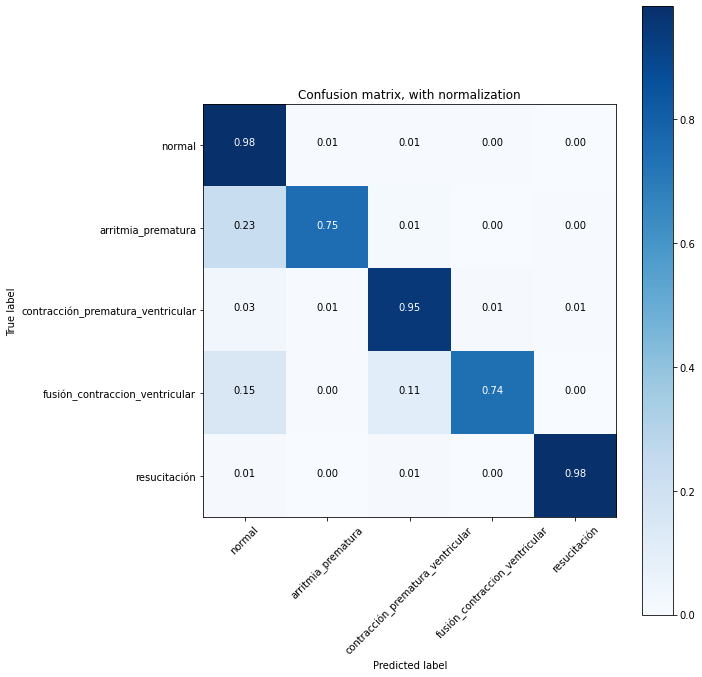

In [174]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes= label_names,
                      title='Confusion matrix, with normalization',
                      normalize=True)
plt.show()

Podemos ver en nuestra matriz de confusión que se equivoca sobre todo en la categoria de fusion contraccion ventricular, confundiendola un 15% de veces con algo "normal" y un 11% con una contraccion prematura ventricular

**MODELO 2: funcion activacion ELU, SIN callbacks y todos los dropouts**

Ahora, podemos comparar este modelo con el mismo, pero sin los **callbacks**  puesto que como vemos en las imagenes de abajo, habia un overfitting, que se podia ver por la separacion de los valores y en la matriz de confusion

In [175]:
#en caso de no tener instalado pillow, sera necesario instalar el modulo con el siguiente comando:
#!pip install pillow

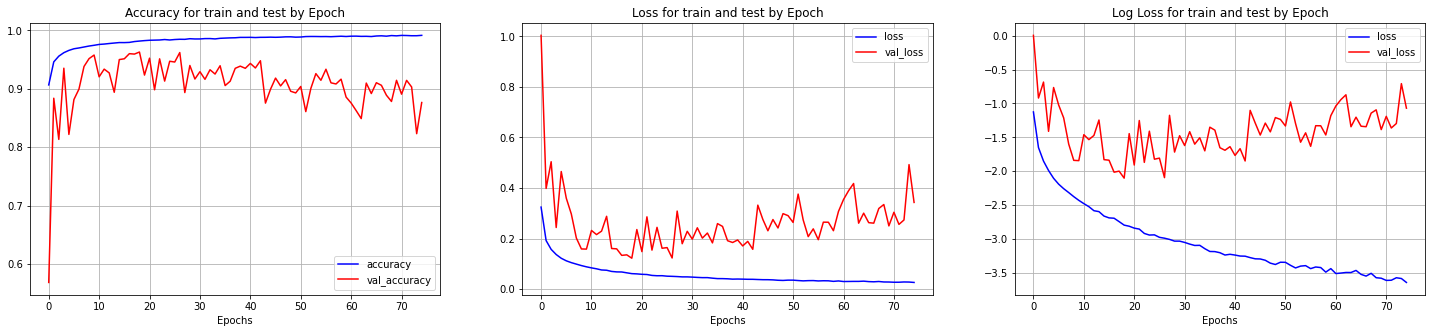

In [4]:
from PIL import Image
graphs=Image.open("descarga.png")
graphs

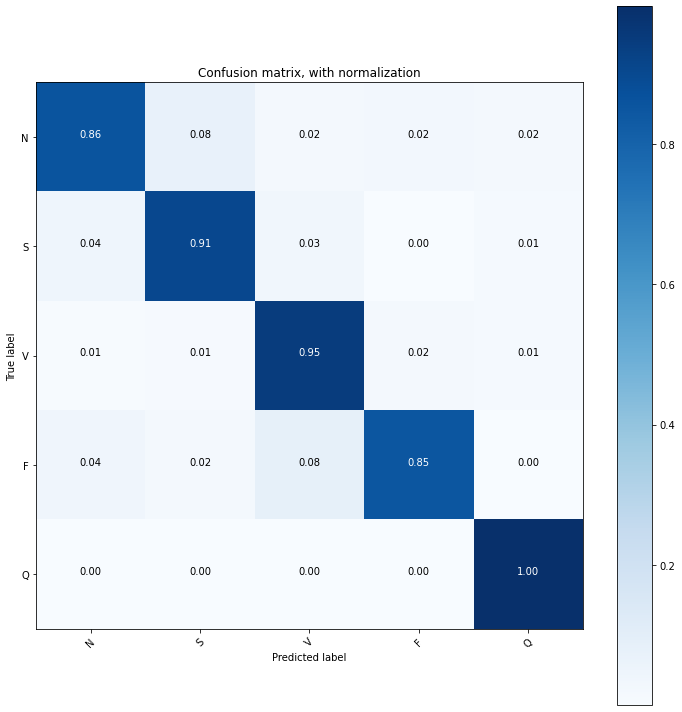

In [5]:
image = Image.open("matrix.png")
image

**MODELO 3: funcion activacion ELU, callbacks y todos los dropouts**
Al mantener la estructura original del modelo con todos los dropouts y los callbacks, no obteniamos buenos resultados

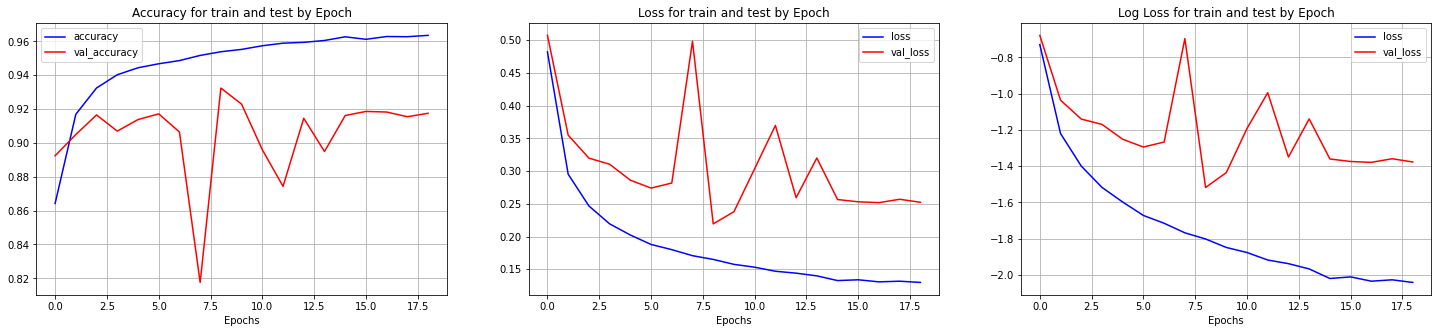

In [6]:
graphs_con = Image.open("con_dropouts.png")
graphs_con

Estas graficas reflejaban una absoluta disparidad entre la prediccion y la validación que mas tarde en la matriz de confusión se podria ver que no hacia una buena predicción, se equivoca bastante. Ademas en el evaluate del modelo, la precisión salia francamente baja en comparación.

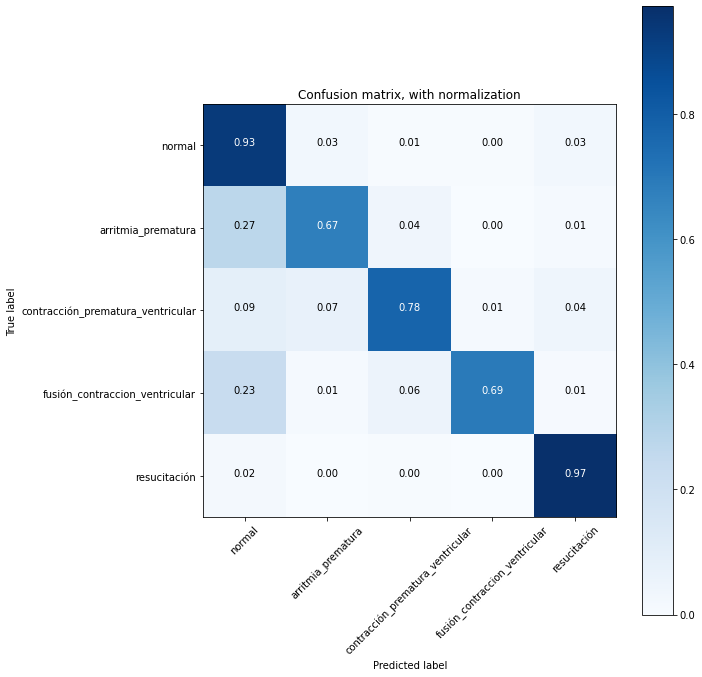

In [7]:
matrix_con = Image.open("matrix_callbacks_con_dropouts.png")
matrix_con

**MODELO 4: funcion activacion RELU, callbacks y todos los dropouts**

El modelo de activacion RELU resultó acertar bastante, a pesar de necesitar más epocas que el mejor que habiamos visto hasta ahora, el modelo con la funcion ELU, callbacks y SIN todos los dropouts

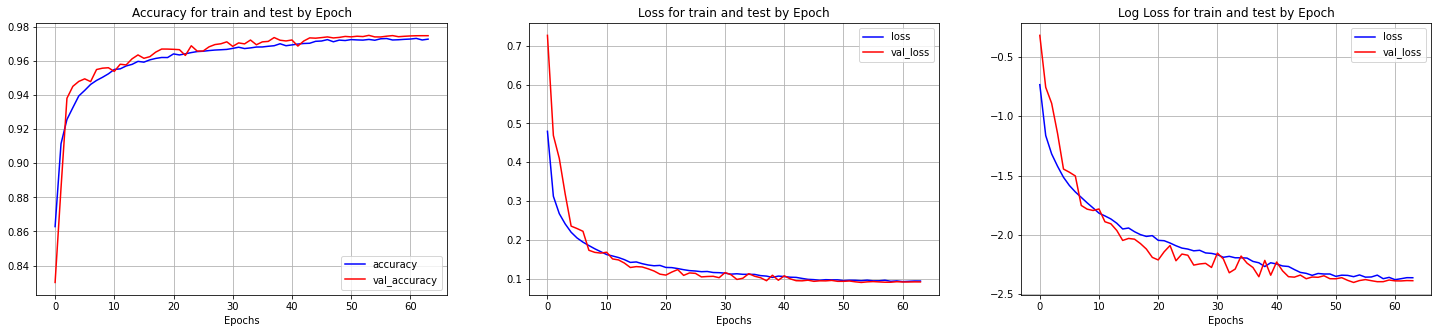

In [8]:
graphs_RELU_con = Image.open("RELU_con_dropouts.png")
graphs_RELU_con

Aqui podemos ver que tengo que val_loss mejor que loss, lo cual puede indicar un overfitting, que ahora cuando se vea la matriz de confusión confirmaremos que existe en la categoria normal y la de resucitacion (0 y 4)

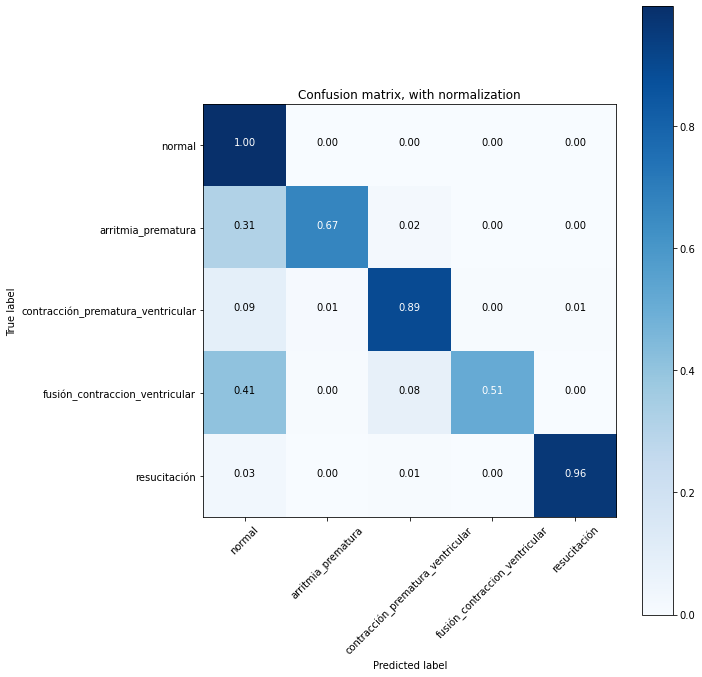

In [9]:
matrix_RELU_con = Image.open("RELU_matrix_callbacks_con_dropouts.png")
matrix_RELU_con

**MODELO 5: funcion activacion RELU, callbacks y SIN todos los dropouts**

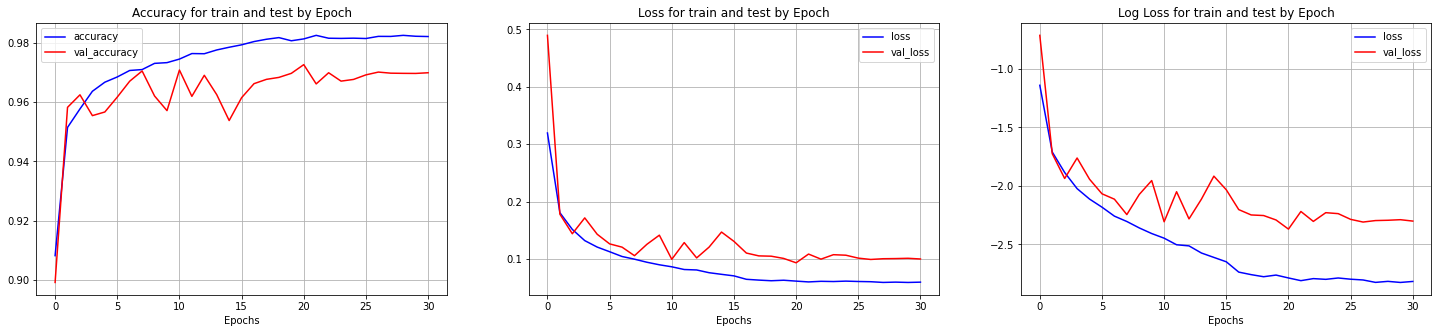

In [10]:
graphs_RELU_sin = Image.open("RELU_sin_dropouts.png")
graphs_RELU_sin

Viendo tanto las graficas, como la matriz de confusión, podemos decir que no ha mejorado mucho el modelo quitando algunos de los dropouts que antes tambien habiamos quitado con ELU

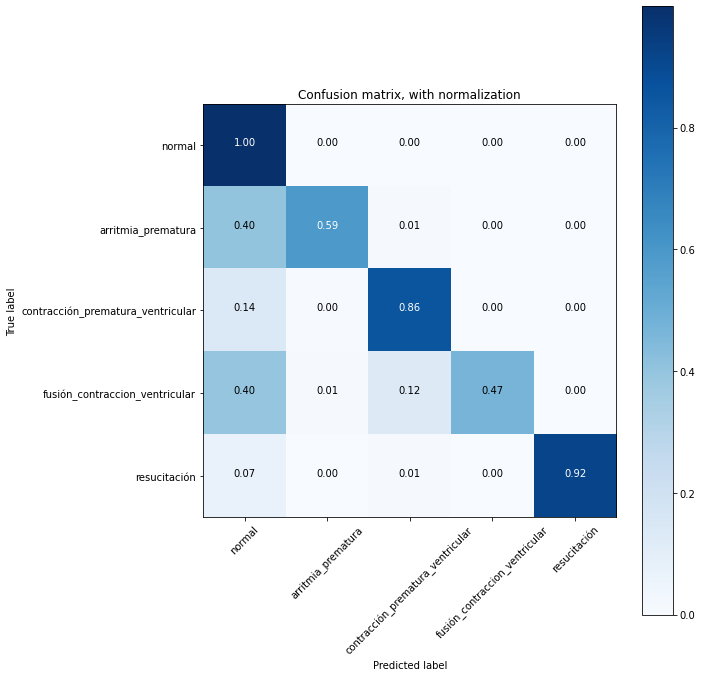

In [11]:
matrix_RELU_sin = Image.open("RELU_matrix_callbacks_sin_dropouts.png")
matrix_RELU_sin

**CONCLUSION**
El modelo que mejor nos ha funcionado ha resultado ser el modelo 1

**Observaciones aparte**
Quizá viendo que hay bastante desbalance entre las clases podemos considerar poner como métrica de entrenamiento f1 en vez de accuracy

**MODELO 6: METRICA F1 funcion activacion ELU, callbacks y SIN todos los dropouts**

hemos tenido que hacer una serie de cambios, en primer lugar hemos tenido que importar esto:
>from keras.callbacks import Callback,ModelCheckpoint
>from keras.models import Sequential,load_model
>from keras.layers import Dense, Dropout
>from keras.wrappers.scikit_learn import KerasClassifier
>import keras.backend as K

después definir la función f1:
>def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

y por ultimo:
>model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=[get_f1])

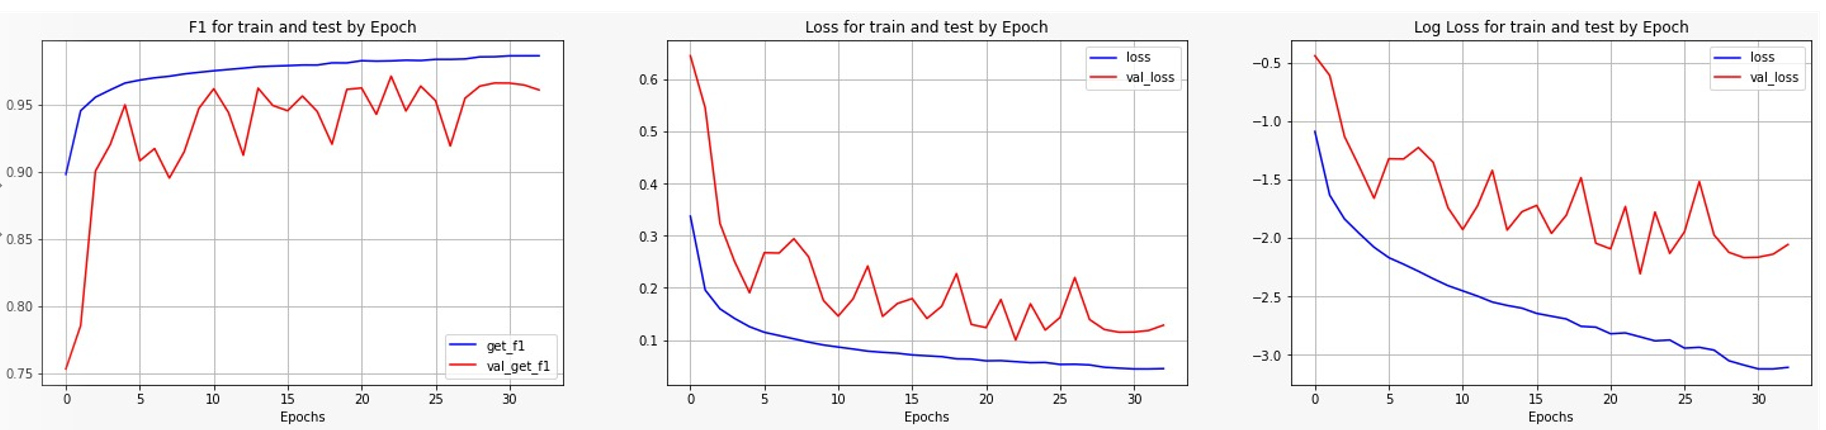

In [13]:
graphs__f1_ELU_con = Image.open("F1_ELU_callbacks_sin_dropouts.png")
graphs__f1_ELU_con

Como podemos ver en la matriz de confusion, los FN son menores, ahora tenemos un 84% donde antes habia un 77% o un 65%

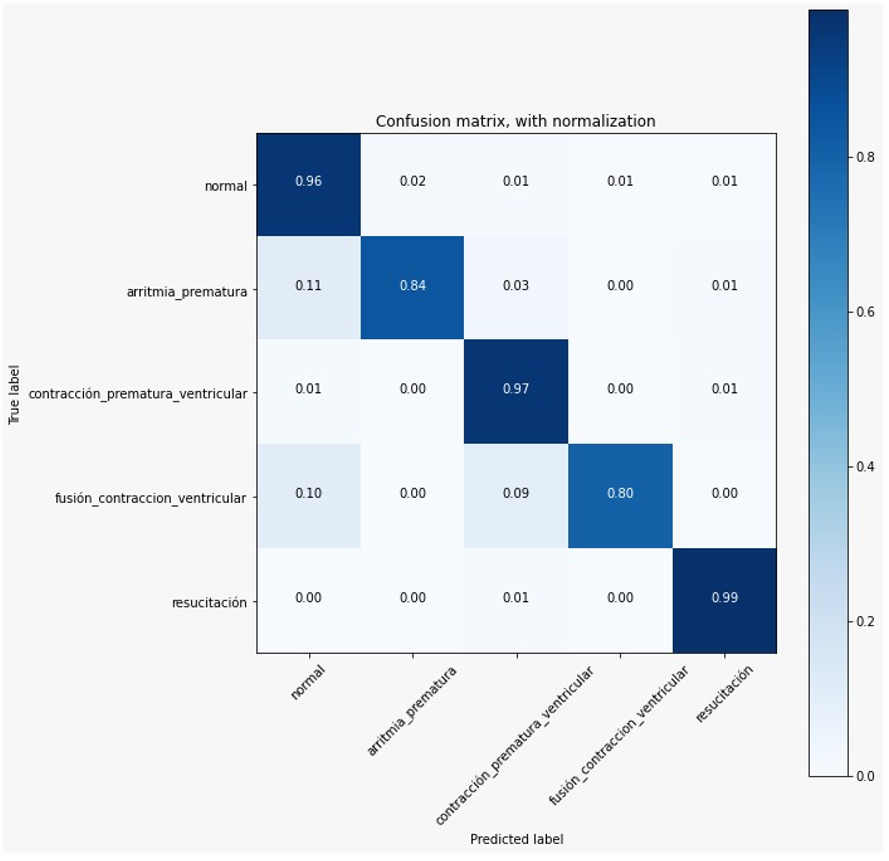

In [14]:
matrix_f1_ELU_con = Image.open("F1_ELU_matrix_callbacks_sin_dropouts.png")
matrix_f1_ELU_con

**observacion** es posible que bajando el learning rate a 0.0001 mejore

**MODELO 7: METRICA F1 funcion activacion ELU, callbacks y SIN todos los dropouts**

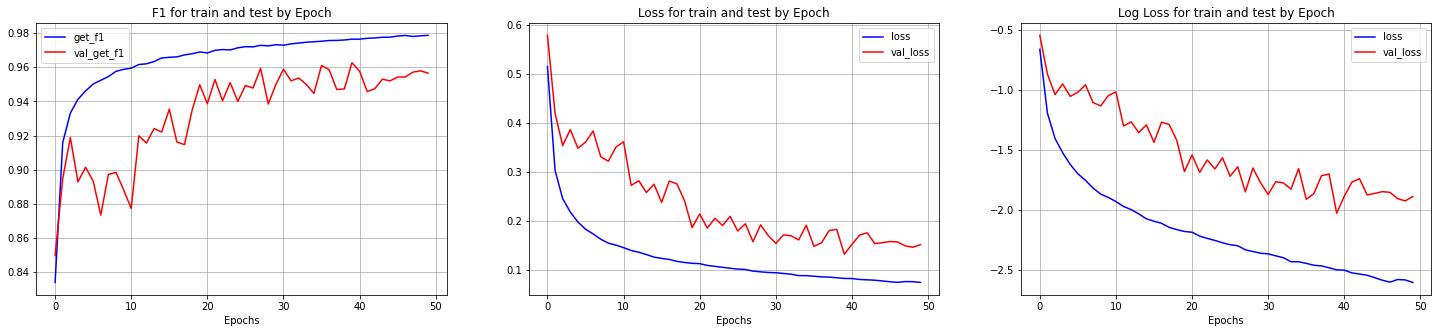

In [15]:
graphs__f1_ELU_con_lr = Image.open("F1_ELU_callbacks_sin_dropouts_lr.png")
graphs__f1_ELU_con_lr

bajando el learning rate a 0.0001 no mejora respecto a 0.0005

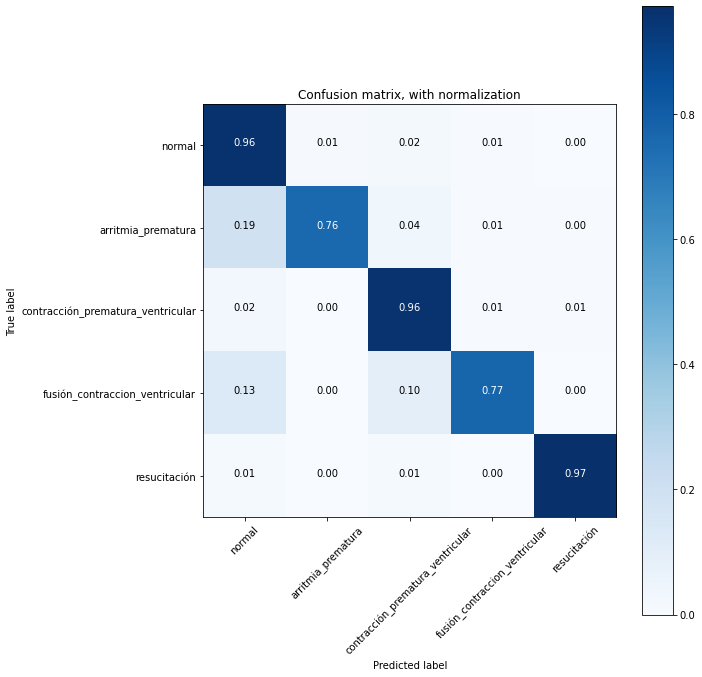

In [16]:
matrix_f1_ELU_con_lr = Image.open("F1_ELU_matrix_callbacks_sin_dropouts_lr.png")
matrix_f1_ELU_con_lr

 **CONCLUSION FINAL**
Aunque tengamos clases desbalanceadas, parece que aprende algo mejor con accuracy; quizá quedaría por ver como aprende con accuracy y f1 a la vez, haciendo que algun callback monitorice f1 y se ha obtenido los mejores TP con el primer entrenamiento de f1 y lr = 0.005 asi que la intuición de que necesita menos lr a lo mejor no es acertada.
Con accuracy sólo suele dar peores resultados en (1) y (3) que son las clases menos representadas en el dataset asique de alguna forma el f1 ha ayudado que no se pierda la generalización de esos casos

**¿QUE MAS PODRIAMOS HACER?** 
- Cambiar el optimizador "ADAM" y compararlo con ADAMAX Y NADAM
- Comparar metricas o entrenar con las dos:  metrics=['accuracy', get_f1] 

***Preguntas:***

- **Si tomamos todo lo que no sea normal como positivo, ¿el modelo se equivoca mas en falsos positivos o en falsos negativos?**
Vemos que nuestro modelo genera solo falsos negativos por que todas las personas sanas son clasificadas como sanas (la fila de N en la matriz de confusión sólo es no-cero en N) mientras que las personas no sanas tienen una cierta probabilidad de ser declaradas como sanas.

- **¿Que categoría genera mayor error?**

La categoría de gente sana (N) genera casi todo el error.

- **¿Existe overfitting? ¿Qué se observaría en  las gráficas de Accuracy-Epochs en el caso de tener overfitting?**
Sí, se puede observar en los gráficos de comparación de accuracy y loss que a partir de la época aprox. 12, la validation accuracy empieza a caer de forma oscilatoria y la validation loss empieza a subir de forma oscilatoria, mientras que en ambos casos las variables de training siguen mejorando. Esto es indicatorio de overfitting.


- **¿Cuántos parámetros tiene que entrenar nuestro modelo? ¿Cómo podriamos conseguir que nuestro modelo fuera más sencillo en caso de overfitting teniendo en cuenta los parámetros?**
puedes saberlo en el sumary:
Total params: 95,781
Trainable params: 95,525
Non-trainable params: 256
Un modelo te hace overfiting cuando memoriza los datos, y este no es capaz de generalizar, podemos quitarle capas o aplicando medidas de regularizacion como los bacthnormalization los dropouts. Tambien podemos probar otras metricas para ver si generaliza mejor, como usando F1 en vez de accuracy,


- **¿Como afecta batch_size al entrenamiento?**
Aparte de las diferencias en el tiempo de entrenamiento, se puede ver que tener un batch_size demasiado grande afecta a las posibilidades de overfitting, ya que eso ayuda a la red neuronal a alcanzar el mínimo global de forma muy rápida y precisa, lo cual provoca un gran overfitting ya que estamos aprendiendo el mínimo global del conjunto de datos de entrenamiento y no el de los datos reales/totales. Por otra parte, usar un batch_size demasiado pequeño puede hacer que caigamos en un mínimo local y no escapemos de ahí (menos peligroso para optimizadores que usen la técnica del momento, etc.). Un batch_size de alrededor de 100 parece más o menos óptimo.

- **¿Qué tipo de red neuronal hemos utilizado para nuestro modelo? ¿De qué partes consta? ¿Para qué tipo de datos suelen utilizarse este tipo de red?**
Estamos utilizando un tipo de red neuronal convolucional


Ahora os toca a vosotros mejorar el modelo. Probad con otros optimizadores, cambiar la función de coste, volveros locos con el batch_size..... El paper del principio puede dar alguna pista. Como siempre, el que tenga la mejor score, ¡tiene premio!